In [12]:
import pandas as pd

air_no2 = pd.read_csv("/home/lucas/Downloads/notebook-jupyter/tabelas-csv/air_quality_no2_long.csv", parse_dates = True)
air_slc = air_no2[["date.utc", "location", "parameter", "value"]]
air_slc

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4
...,...,...,...,...
2063,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0
2064,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0
2065,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0
2066,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0


In [11]:
air_pm = pd.read_csv("/home/lucas/Downloads/notebook-jupyter/tabelas-csv/air_quality_pm25_long.csv",parse_dates = True)
air_slc_1 = air_no2[["date.utc", "location", "parameter", "value"]]
air_slc_1

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4
...,...,...,...,...
2063,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0
2064,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0
2065,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0
2066,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0


In [18]:
# Cocatenar as duas tabelas com semelhanças em uma única tabela
air_quality = pd.concat([air_slc, air_slc_1], axis=0)
# Adicionar um índice de linha adicional
air_quality = pd.concat([air_slc, air_slc_1], keys=["PM25", "NO2"])
air_quality

date.utc            location parameter  value
PM25 0     2019-06-21 00:00:00+00:00             FR04014       no2   20.0
     1     2019-06-20 23:00:00+00:00             FR04014       no2   21.8
     2     2019-06-20 22:00:00+00:00             FR04014       no2   26.5
     3     2019-06-20 21:00:00+00:00             FR04014       no2   24.9
     4     2019-06-20 20:00:00+00:00             FR04014       no2   21.4
...                              ...                 ...       ...    ...
NO2  2063  2019-05-07 06:00:00+00:00  London Westminster       no2   26.0
     2064  2019-05-07 04:00:00+00:00  London Westminster       no2   16.0
     2065  2019-05-07 03:00:00+00:00  London Westminster       no2   19.0
     2066  2019-05-07 02:00:00+00:00  London Westminster       no2   19.0
     2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0

[4136 rows x 4 columns]

In [ ]:
# Para realizar um merge: air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
# OU: air_quality = pd.merge(air_quality, air_quality_parameters, how='left', left_on='parameter', right_on='id')


In [23]:
import matplotlib.pyplot as plt

quality_long = pd.read_csv(
    "/home/lucas/Downloads/notebook-jupyter/tabelas-csv/air_quality_no2_long.csv", index_col="date.utc", parse_dates=True
)

quality_long = quality_long.rename(columns={"date.utc": "datatime"})
quality_long.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [24]:
# Troca de tipos de objetos
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

PM25  0      2019-06-21 00:00:00+00:00
      1      2019-06-20 23:00:00+00:00
      2      2019-06-20 22:00:00+00:00
      3      2019-06-20 21:00:00+00:00
      4      2019-06-20 20:00:00+00:00
                        ...           
NO2   2063   2019-05-07 06:00:00+00:00
      2064   2019-05-07 04:00:00+00:00
      2065   2019-05-07 03:00:00+00:00
      2066   2019-05-07 02:00:00+00:00
      2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 4136, dtype: datetime64[ns, UTC]

In [25]:
# Data de inicio e termino da tabela
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [26]:
# Duração da série temporal
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [27]:
# Adicionar nova coluna do mês da medição
air_quality["month"] = air_quality["datetime"].dt.month
air_quality

datetime            location parameter  value  month
PM25 0    2019-06-21 00:00:00+00:00             FR04014       no2   20.0      6
     1    2019-06-20 23:00:00+00:00             FR04014       no2   21.8      6
     2    2019-06-20 22:00:00+00:00             FR04014       no2   26.5      6
     3    2019-06-20 21:00:00+00:00             FR04014       no2   24.9      6
     4    2019-06-20 20:00:00+00:00             FR04014       no2   21.4      6
...                             ...                 ...       ...    ...    ...
NO2  2063 2019-05-07 06:00:00+00:00  London Westminster       no2   26.0      5
     2064 2019-05-07 04:00:00+00:00  London Westminster       no2   16.0      5
     2065 2019-05-07 03:00:00+00:00  London Westminster       no2   19.0      5
     2066 2019-05-07 02:00:00+00:00  London Westminster       no2   19.0      5
     2067 2019-05-07 01:00:00+00:00  London Westminster       no2   23.0      5

[4136 rows x 5 columns]

In [28]:
# Média para cada dia da semana de uma tabela
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()


datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

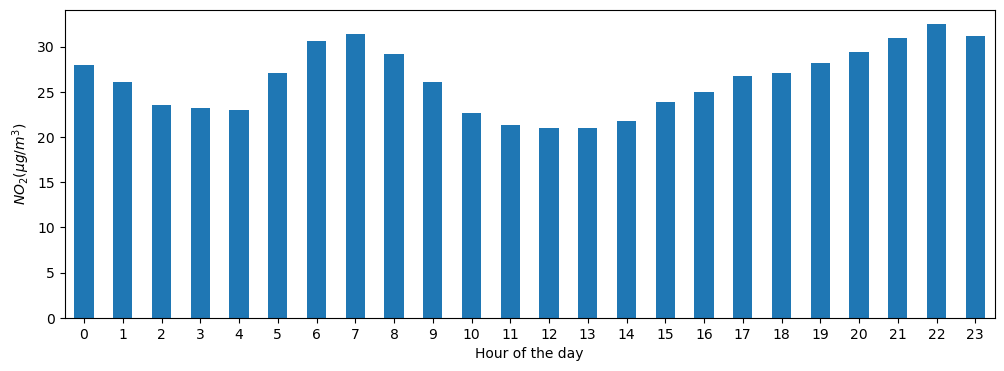

In [29]:
# Valor médio para cada hora do dia
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Hour of the day");  # custom x label using Matplotlib
plt.ylabel("$NO_2 (µg/m^3)$");